# Challenge: Iterate and evaluate your classifier

It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

1. Do any of your classifiers seem to overfit?
2. Which seem to perform the best? Why?
3. Which features seemed to be most impactful to performance?

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install requests

In [0]:
data_path = ("https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/imdb_labelled.txt")
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['statement', 'positive']

In [4]:
sms_raw.head(3)

,statement,positive
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0


In [0]:
site = data_path

We remove the casing and punctuation from our statement feature, as we don't believe that it will affect the prediction of whether a statement has a positive or negative sentiment.

In [0]:
sms_raw['statement'] = sms_raw['statement'].str.lower()

In [0]:
sms_raw['statement'].replace(',.!-:','',regex=True,inplace=True)

In [8]:
sms_raw['positive'].unique()

array([0, 1])

In [9]:
sms_raw.shape[0]

748

The dataset is well balanced, with a ~2% difference in the number of negative vs positive comments.

In [10]:
percentageOfPositiveComments = (sms_raw['positive'].sum() / sms_raw.shape[0]) * 100
print("The percentage of ṕositive comments is " + str(percentageOfPositiveComments) )

The percentage of ṕositive comments is 51.60427807486631


In [0]:
keywords = ['best', 'good', 'great', 'exciting', 'excellent', 'awesome', 'cool', 'amazing', 'well', 'better', 'memorable', 'unforgettable', 'moving']

for key in keywords:

    sms_raw[str(key)] = sms_raw.statement.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

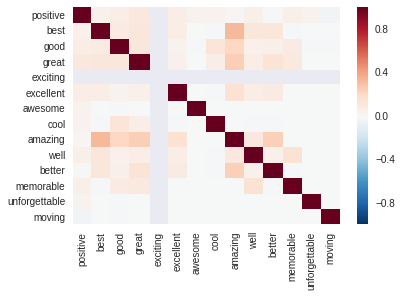

In [12]:
sns.heatmap(sms_raw.corr())

In [0]:
data = sms_raw[keywords]
target = sms_raw['positive']

In [14]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

print("The number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

The number of mislabeled points out of a total 748 points : 331


## First Iteration
We compare the keyword search to the actual percentage of Positive comments.

In [15]:
accuracy = ((target == y_pred).sum()/(data.shape[0]))
print("The acuracy of our keyword search is is " + str(accuracy))

The acuracy of our keyword search is is 0.5574866310160428


In [16]:
def computeConfusionMatrix(y_pred, target):
  TP = 0 
  TN = 0
  FP = 0
  FN = 0 
  
  for index, value in enumerate(y_pred):
    #count true_positives
    if y_pred[index] == 1 and target[index] == 1: 
      TP = TP + 1
    #count false positives
    if y_pred[index] == 1 and target[index] == 0:
      FP = FP + 1
    #count true negatives
    if y_pred[index] == 0 and target[index] == 0:
      TN = TN + 1
    #count false negatives
    if y_pred[index] == 0 and target[index] == 1:
      FN = FN + 1
    
      
  return TP, TN, FP, FN
       
def accuracy(TP, TN, FP, FN):
  return (TP + TN) / (TP + TN + FP + FN )
 
def precision(TP, FP):
  return (TP / (TP + FP))

# aka sensitivity
def recall(TP, FN):
  return (TP / (TP + FN))

# aka Dice similarity coefficient
def f1Measure(precision, recall):
  return (2 * precision * recall) / (precision + recall)


TP, TN, FP, FN = computeConfusionMatrix(y_pred, target)

acc = accuracy(TP, TN, FP, FN)
print("accuracy = " + str(acc))

prec = precision(TP, FP )
print("precision = " + str(prec))

rec = recall(TP, FN)
print("recall = " + str(rec))

f1 = f1Measure(prec, rec)
print("f1 = " + str(f1))

accuracy = 0.5574866310160428
precision = 0.7777777777777778
recall = 0.19948186528497408
f1 = 0.31752577319587627


## Second Iteration
We compute the accuracy using the Gaussian method.

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.53947368, 0.55263158, 0.6       , 0.50666667, 0.57333333,
       0.52      , 0.64864865, 0.52702703, 0.52702703, 0.5       ])

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

data = sms_raw[keywords]
gnb.fit(data, target)

y_predTwo = gnb.predict(data)

print("The number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_predTwo).sum()
))

print("The Gaussian approach appears to be less accurate.")

The number of mislabeled points out of a total 748 points : 360
The Gaussian approach appears to be less accurate.


In [19]:

#np.int_
TP, TN, FP, FN = computeConfusionMatrix(np.int_(y_predTwo), target)

acc = accuracy(TP, TN, FP, FN)
print("accuracy = " + str(acc))

prec = precision(TP, FP )
print("precision = " + str(prec))

rec = recall(TP, FN)
print("recall = " + str(rec))

f1 = f1Measure(prec, rec)
print("f1 = " + str(f1))

accuracy = 0.5187165775401069
precision = 0.8421052631578947
recall = 0.08290155440414508
f1 = 0.15094339622641512


## Third Iteration
Instead of the simple keywords, we reference dictionaries for positive and negative words and compare to our keyword search.

In [20]:
pos_words = ("https://raw.githubusercontent.com/andandandand/CSV-datasets/master/positive-words.txt") 
neg_words = ("https://raw.githubusercontent.com/andandandand/CSV-datasets/master/negative-words.txt")

pos = pd.read_csv(pos_words)
neg = pd.read_csv(neg_words)

pos.head(5)

,positive-words
0,a+
1,abound
2,abounds
3,abundance
4,abundant


In [21]:
neg.head(5)

,negative-words
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable


In [0]:
sent_words = [pos, neg]

In [0]:
import requests

import io

def build_site_dataframe(website_reviews):
    wr = requests.get(website_reviews).content
    df = pd.read_table(io.StringIO(wr.decode('utf-8')), 
                       delimiter='\t\d\n', header=None)
    df = df[0].str.split(pat='\t', n=-1, expand=True)
    df = df.rename(columns={0: 'review', 1: 'sentiment'})
    df = df[['sentiment', 'review']]
    return df

In [0]:
def add_sent_words_to_df(df, sent_words):
    for sent in sent_words:
        for word in sent.iloc[:,0]:
            df[str(word)] = df['review'].str.lower().str.contains(str(word), regex=False)
    return df

In [0]:
def run_bernoulli(prepped_df, site):
    data_two = prepped_df.iloc[:,2:] # why do we do this selection? 
    target_two = prepped_df['sentiment']

    from sklearn.naive_bayes import BernoulliNB

    bnb = BernoulliNB()

    bnb.fit(data_two, target_two)

    y_pred = bnb.predict(data_two)

    print(site[site.rfind('/')+1:site.rfind('_')])
    print("Number of mislabeled points out of a total {} points : {}".format(data_two.shape[0], 
                                                                             (target_two != y_pred).sum()))
    print('Testing on Sample (Accuracy): ' + str(bnb.score(data_two, target_two)))
    print('\n')
    
    return y_pred

In [26]:
bernoulliPred = run_bernoulli(add_sent_words_to_df(build_site_dataframe(site), sent_words), site)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


imdb
Number of mislabeled points out of a total 1000 points : 123
Testing on Sample (Accuracy): 0.877




In [27]:
np.unique(bernoulliPred)

array(['0', '1'], dtype='<U1')

## Fourth Iteration
We add a count of positive words and count of negative words as features.

In [30]:
posCount = (target != y_pred).sum()
negCount = 748 - posCount
print(posCount)
print(negCount)

331
417


## Fifth Iteration
We add the difference between positive and negative words as features.

In [31]:
fifthIteration = posCount - negCount
print(fifthIteration)

-86
